In [13]:
import pandas as pd

def read_data(file_name):
    df = pd.read_csv(file_name, names=['data_id', 'accel0X', 'accel0Y', 'accel0Z', 'accel1X', 'accel1Y',
                                    'accel1Z', 'tension', 'timestamp'])
    df['time'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['tension'] = 0.650 * (df['tension'] - 2166)
    return df

In [14]:
df = read_data('accel_plastic.txt')

In [15]:
from pandas.io.json import json_normalize

def establish_printing_start(file_name):
    df = pd.read_json(file_name, lines=True)
    df = json_normalize(df.to_dict('records'))
    return df[df.status=='P'].head(1)['timestamp'].values[0]

In [16]:
date = establish_printing_start('interface_plastic.json')
date

numpy.datetime64('2019-10-30T09:39:49.540000000')

In [17]:
df = df[df.time > date]
tension_df = df[['time', 'tension']]
tension_df = tension_df.set_index('time')
tension_df = tension_df.groupby(pd.Grouper(freq='2s')).mean()

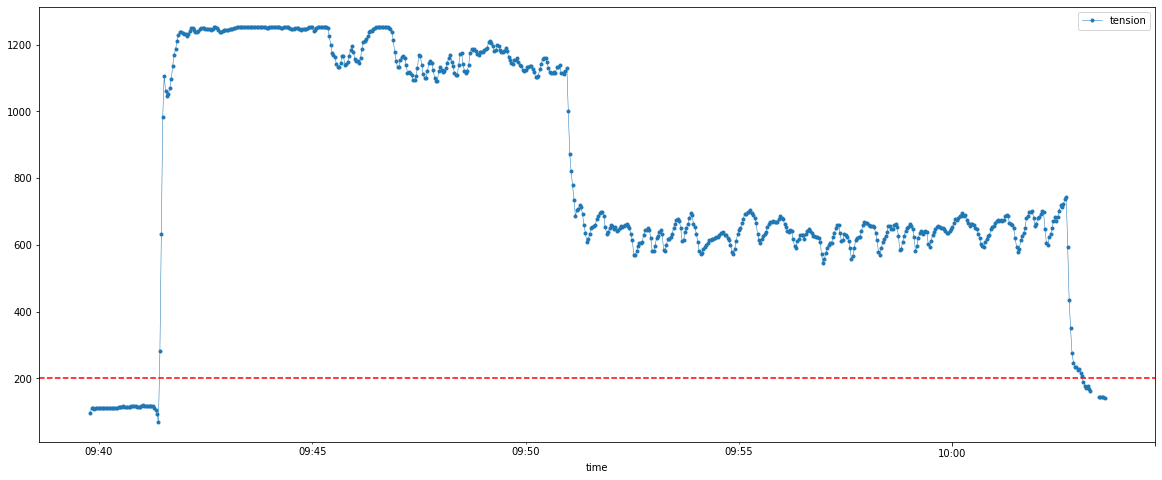

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

tension_df.plot(y='tension', use_index=True, marker=".", linewidth=0.5, markersize=6, figsize=(20,8))
plt.axhline(y=200, color='r', linestyle='--')

In [7]:
df_head = read_data('head_arm_failure.txt')
date = establish_printing_start('head_arm_failure.json')
df_head = df_head[df_head.time > date]

In [8]:
import math
square = lambda x, y : math.sqrt(x*x + y*y)

# df_head['accel1Z'] = df_head['accel1Z'] + 9.80665

df_head['YZ'] = df_head.apply(lambda row: square(row['accel1Y'], row['accel1Z']), axis=1)
df_head['XZ'] = df_head.apply(lambda row: square(row['accel1X'], row['accel1Z']), axis=1)
df_head['XY'] = df_head.apply(lambda row: square(row['accel1X'], row['accel1Y']), axis=1)

conversion = lambda x, y: math.degrees(math.atan2(x, y))

df_head['rho'] = df_head.apply(lambda row: conversion(row['accel1X'], row['YZ']), axis=1)
df_head['phi'] = df_head.apply(lambda row: conversion(row['accel1Y'], row['XZ']), axis=1)
df_head['theta'] = df_head.apply(lambda row: conversion(row['XY'], row['accel1Z']), axis=1)

In [9]:
df_head

,data_id,accel0X,accel0Y,accel0Z,accel1X,accel1Y,accel1Z,tension,timestamp,time,YZ,XZ,XY,rho,phi,theta
1526,318458,-0.830,-0.115,9.678,0.237,0.218,-9.873,173.55,1.573638e+12,2019-11-13 09:47:38.088,9.875406,9.875844,0.322014,1.374778,1.264545,178.131925
1527,318463,-0.790,-0.102,9.660,0.164,0.192,-9.833,172.25,1.573638e+12,2019-11-13 09:47:38.093,9.834874,9.834368,0.252507,0.955339,1.118465,178.528991
1528,318468,-0.780,-0.132,9.660,0.190,0.258,-9.844,200.20,1.573638e+12,2019-11-13 09:47:38.098,9.847380,9.845833,0.320412,1.105355,1.501034,178.135739
1529,318473,-0.700,-0.114,9.678,0.259,0.246,-9.814,152.75,1.573638e+12,2019-11-13 09:47:38.103,9.817083,9.817417,0.357207,1.511260,1.435389,177.915484
1530,318478,-0.720,-0.109,9.648,0.189,0.192,-9.840,181.35,1.573638e+12,2019-11-13 09:47:38.108,9.841873,9.841815,0.269416,1.100154,1.117618,178.431652
1531,318483,-0.550,-0.124,9.666,0.189,0.239,-9.833,179.40,1.573638e+12,2019-11-13 09:47:38.113,9.835904,9.834816,0.304700,1.100821,1.392095,178.225116
1532,318488,-0.690,-0.124,9.669,0.270,0.252,-9.805,179.40,1.573638e+12,2019-11-13 09:47:38.118,9.808238,9.808717,0.369329,1.576833,1.471687,177.842835
1533,318493,-0.640,-0.118,9.671,0.226,0.182,-9.772,209.30,1.573638e+12,2019-11-13 09:47:38.123,9.773695,9.774613,0.290172,1.324631,1.066705,178.299144
1534,318498,-0.740,-0.112,9.687,0.177,0.214,-9.818,158.60,1.573638e+12,2019-11-13 09:47:38.128,9.820332,9.819595,0.277714,1.032578,1.248458,178.379752
1535,318503,-0.660,-0.144,9.680,0.254,0.243,-9.826,192.40,1.573638e+12,2019-11-13 09:47:38.133,9.829004,9.829282,0.351518,1.480301,1.416181,177.951158


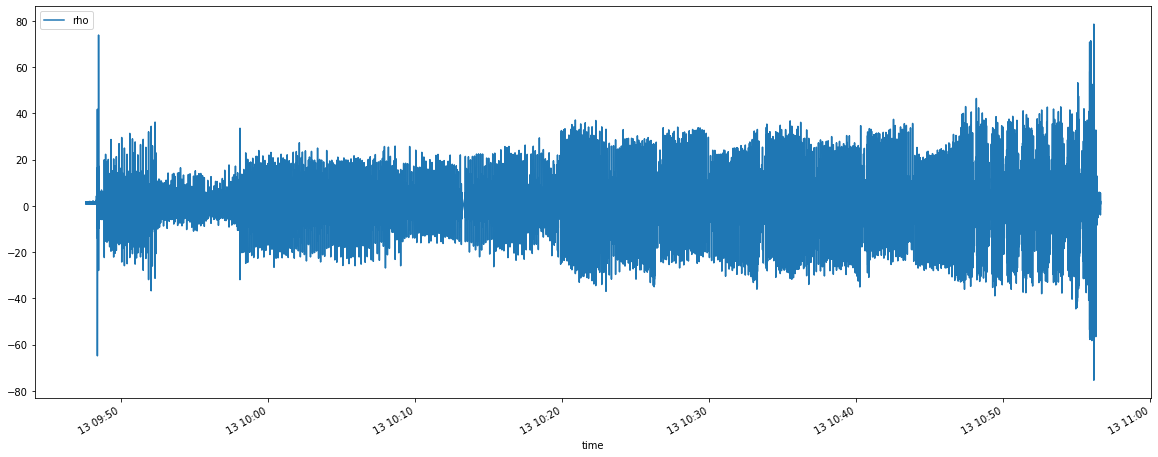

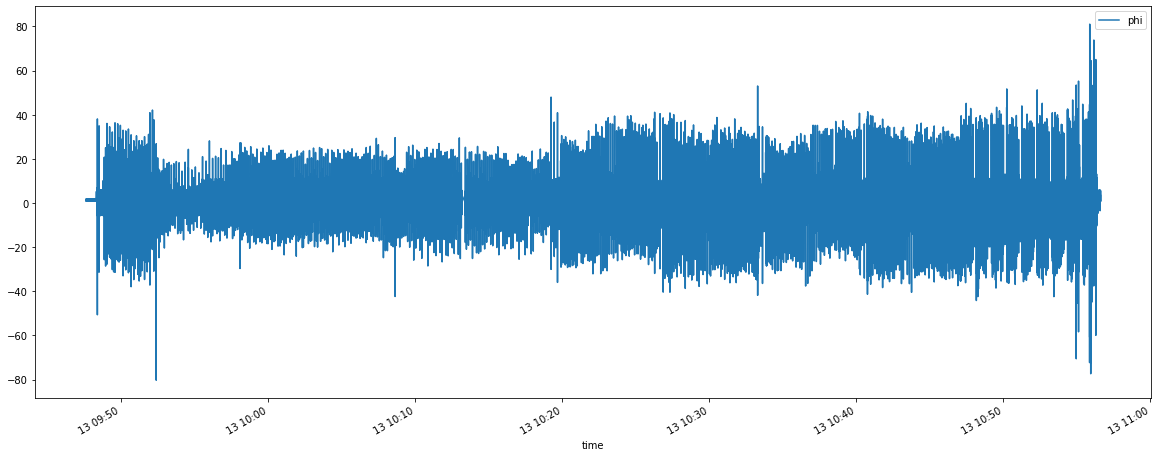

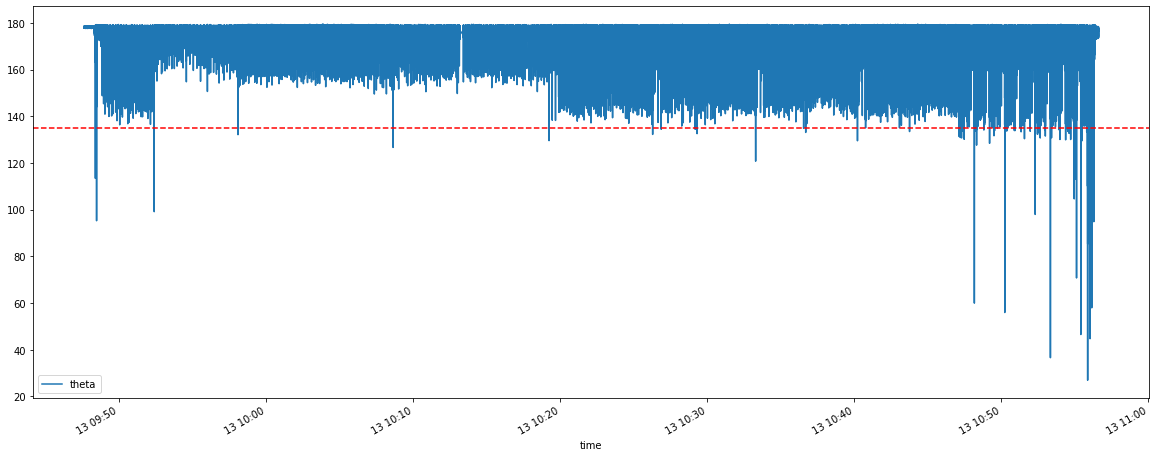

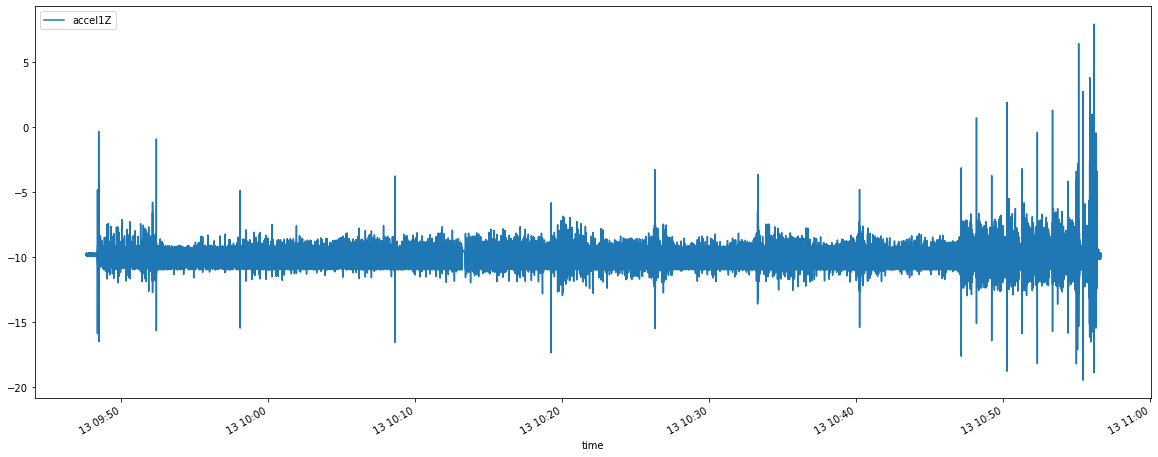

In [23]:
df_head.plot('time', 'rho', figsize=(20, 8))
df_head.plot('time', 'phi', figsize=(20, 8))
df_head.plot('time', 'theta', figsize=(20, 8))
plt.axhline(y=135, color='r', linestyle='--')
df_head.plot('time', 'accel1Z', figsize=(20, 8))

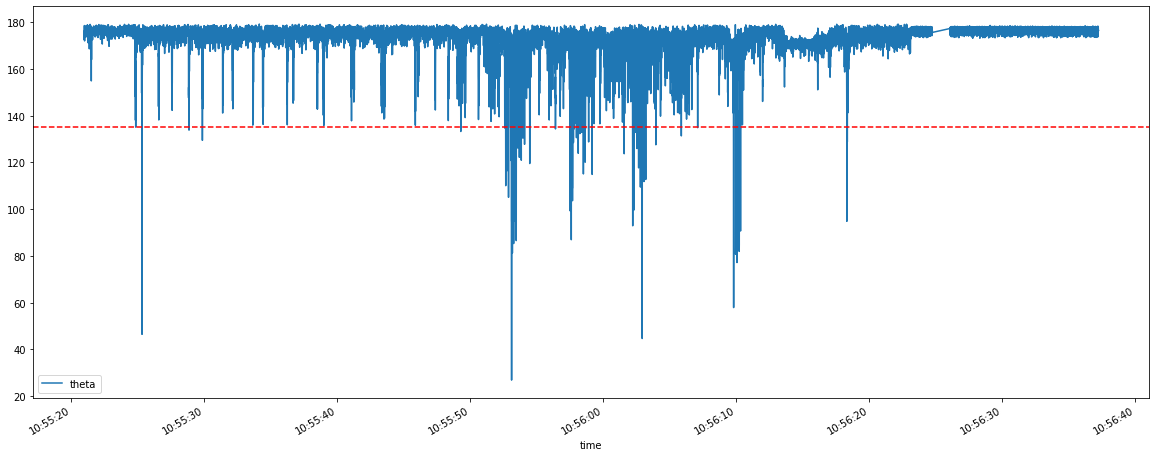

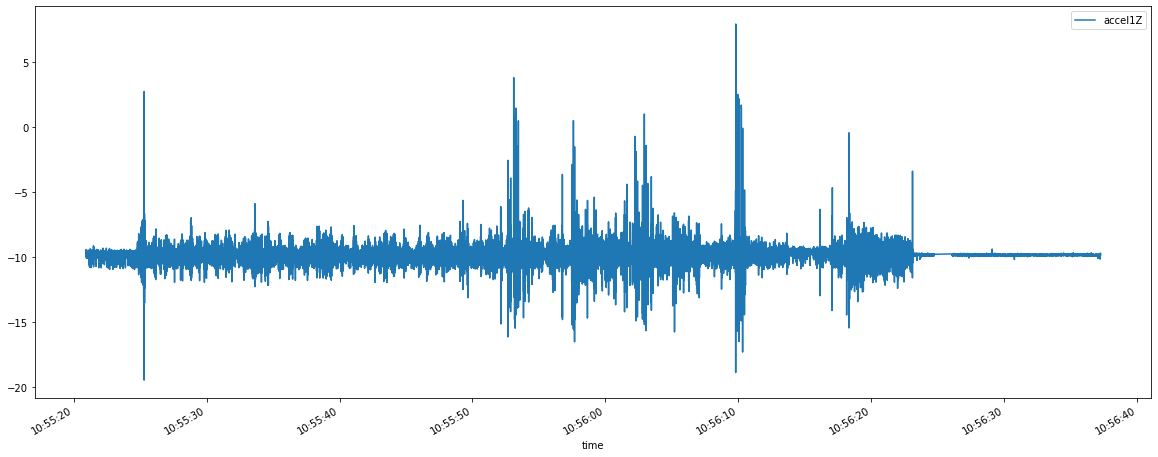

In [25]:
last_ten = df_head.tail(15000)
last_ten.plot('time', 'theta', figsize=(20, 8))
plt.axhline(y=135, color='r', linestyle='--')
last_ten.plot('time', 'accel1Z', figsize=(20, 8))

In [29]:
df = read_data('bowden_accel.txt')
date = establish_printing_start('bowden_interface.json')
df = df[df.time > date]
tension_df = df[['time', 'tension']]
tension_df = tension_df.set_index('time')
tension_df = tension_df.groupby(pd.Grouper(freq='1s')).mean()

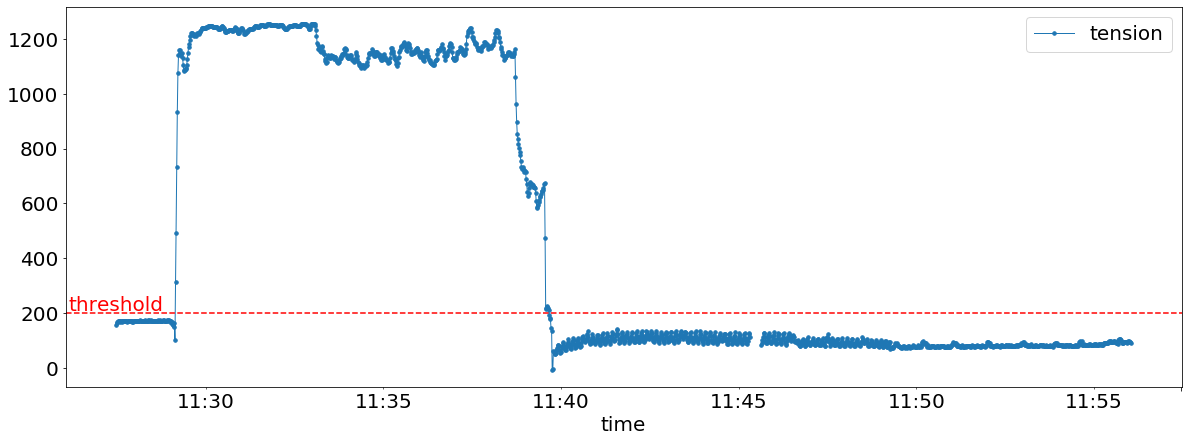

In [67]:
tension_df.plot(y='tension', use_index=True, marker=".", linewidth=1, markersize=7, figsize=(20,7))
plt.rcParams.update({'font.size': 24})
plt.axhline(y=200, color='r', linestyle='--')
plt.text(df[['time']].values[10][0], 230, 'threshold', fontsize=20, va='center', ha='center', 
         color='red')
plt.savefig('tension_plot.png')

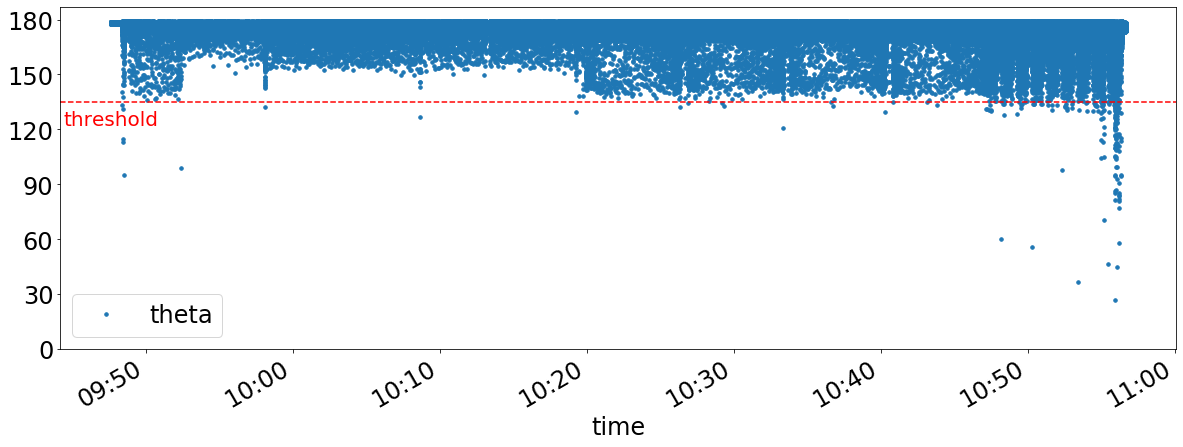

In [96]:
import numpy as np
import matplotlib.dates as mdates

ax = df_head.plot('time', 'theta', marker=".", linewidth=0, markersize=7, figsize=(20,7))
plt.rcParams.update({'font.size': 24})
plt.axhline(y=135, color='r', linestyle='--')
plt.yticks(np.arange(0, 190, step=30))
plt.text(df_head[['time']].values[10][0], 125, 'threshold', fontsize=20, va='center', ha='center', 
         color='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.savefig('theta_plot.png')